In [8]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import geometry
from matplotlib import colors,cm 
from shapely.geometry import Point

In [2]:
ridership=pd.read_csv('ridership by stop - Sept 2019 and 2020.csv')
ridership.head()

,stop_num,stop_name,Sept 2019 Ridership,Sept 2020 Ridership
0,100,Ithaca Commons - Seneca St,20807,6125
1,103,Tioga @ Court,7952,928
2,105,Court @ Linn,4285,677
3,107,Cayuga @ Buffalo,140,55
4,108,Cayuga @ Buffalo,72,12


In [3]:
ridership.shape

(448, 4)

In [4]:
stop_location=pd.read_csv('stop_locations_2020.csv')
stop_location.head()

,stop_id,stop_name,stop_lat,stop_lon
0,100,Ithaca Commons - Seneca St,42.440502,-76.496506
1,103,Tioga @ Court,42.442574,-76.496895
2,105,Court @ Linn,42.443115,-76.494507
3,107,Cayuga @ Buffalo,42.441227,-76.499046
4,108,Cayuga @ Buffalo,42.441402,-76.499176


In [5]:
rider=pd.merge(ridership,stop_location,how='left', left_on=['stop_num','stop_name'], right_on = ['stop_id','stop_name'])

In [6]:
rider=rider.dropna()
rider.head()

,stop_num,stop_name,Sept 2019 Ridership,Sept 2020 Ridership,stop_id,stop_lat,stop_lon
0,100,Ithaca Commons - Seneca St,20807,6125,100.0,42.440502,-76.496506
1,103,Tioga @ Court,7952,928,103.0,42.442574,-76.496895
2,105,Court @ Linn,4285,677,105.0,42.443115,-76.494507
3,107,Cayuga @ Buffalo,140,55,107.0,42.441227,-76.499046
4,108,Cayuga @ Buffalo,72,12,108.0,42.441402,-76.499176


In [7]:
rider['change'] = rider['Sept 2020 Ridership'] - rider['Sept 2019 Ridership']
rider['change_ratio'] = (rider['Sept 2020 Ridership'] - rider['Sept 2019 Ridership'])/rider['Sept 2019 Ridership']
rider.head()

,stop_num,stop_name,Sept 2019 Ridership,Sept 2020 Ridership,stop_id,stop_lat,stop_lon,change,change_ratio
0,100,Ithaca Commons - Seneca St,20807,6125,100.0,42.440502,-76.496506,-14682,-0.705628
1,103,Tioga @ Court,7952,928,103.0,42.442574,-76.496895,-7024,-0.883300
2,105,Court @ Linn,4285,677,105.0,42.443115,-76.494507,-3608,-0.842007
3,107,Cayuga @ Buffalo,140,55,107.0,42.441227,-76.499046,-85,-0.607143
4,108,Cayuga @ Buffalo,72,12,108.0,42.441402,-76.499176,-60,-0.833333


In [9]:
Active = gpd.read_file('TDP_Active_Routes.shp')
Old = gpd.read_file('TDP_Old__routes.shp')
Parcels = gpd.read_file('TCParcels.shp')
Streets = gpd.read_file('TcStreets.shp')

Old = Old.to_crs(epsg=4326)
Streets = Streets.to_crs(epsg=4326)
Parcels = Parcels.to_crs(epsg=4326)

In [10]:
rider_geo = gpd.GeoDataFrame(rider)
xy = [geometry.Point(xy) for xy in zip(rider_geo['stop_lon'],rider_geo['stop_lat'])]
rider_geo['geometry'] = gpd.GeoDataFrame(xy)
#rider_geo= gpre_jwd.drop(['longitude','latitude'],axis=1)
rider_geo.head()

,stop_num,stop_name,Sept 2019 Ridership,Sept 2020 Ridership,stop_id,stop_lat,stop_lon,change,change_ratio,geometry
0,100,Ithaca Commons - Seneca St,20807,6125,100.0,42.440502,-76.496506,-14682,-0.705628,POINT (-76.49651 42.44050)
1,103,Tioga @ Court,7952,928,103.0,42.442574,-76.496895,-7024,-0.883300,POINT (-76.49689 42.44257)
2,105,Court @ Linn,4285,677,105.0,42.443115,-76.494507,-3608,-0.842007,POINT (-76.49451 42.44311)
3,107,Cayuga @ Buffalo,140,55,107.0,42.441227,-76.499046,-85,-0.607143,POINT (-76.49905 42.44123)
4,108,Cayuga @ Buffalo,72,12,108.0,42.441402,-76.499176,-60,-0.833333,POINT (-76.49918 42.44140)


In [11]:
rider_geo=rider_geo.dropna()
rider_geo.head()

,stop_num,stop_name,Sept 2019 Ridership,Sept 2020 Ridership,stop_id,stop_lat,stop_lon,change,change_ratio,geometry
0,100,Ithaca Commons - Seneca St,20807,6125,100.0,42.440502,-76.496506,-14682,-0.705628,POINT (-76.49651 42.44050)
1,103,Tioga @ Court,7952,928,103.0,42.442574,-76.496895,-7024,-0.883300,POINT (-76.49689 42.44257)
2,105,Court @ Linn,4285,677,105.0,42.443115,-76.494507,-3608,-0.842007,POINT (-76.49451 42.44311)
3,107,Cayuga @ Buffalo,140,55,107.0,42.441227,-76.499046,-85,-0.607143,POINT (-76.49905 42.44123)
4,108,Cayuga @ Buffalo,72,12,108.0,42.441402,-76.499176,-60,-0.833333,POINT (-76.49918 42.44140)


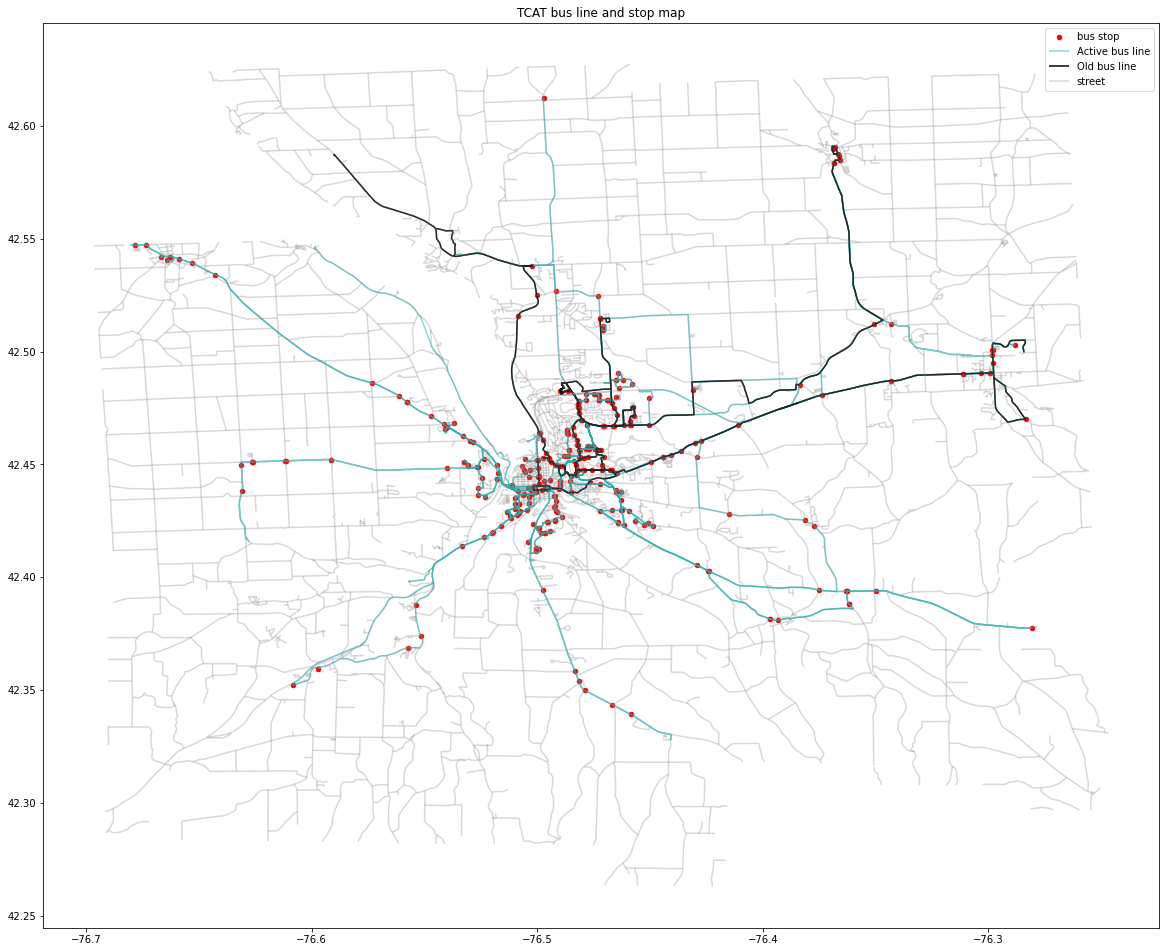

In [12]:
import contextily as ctx

fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')

s=rider_geo['Sept 2019 Ridership']
rider_geo.plot(ax=ax,c="red",alpha=1,label='bus stop',markersize = 20)
Active.plot(ax=ax, color='c',alpha=0.5,label='Active bus line')
Old.plot(ax=ax, color='black',alpha=1,label='Old bus line')
Streets.plot(ax=ax, color='grey',alpha=0.3,label='street')

plt.title("TCAT bus line and stop map")
plt.legend()
plt.show();

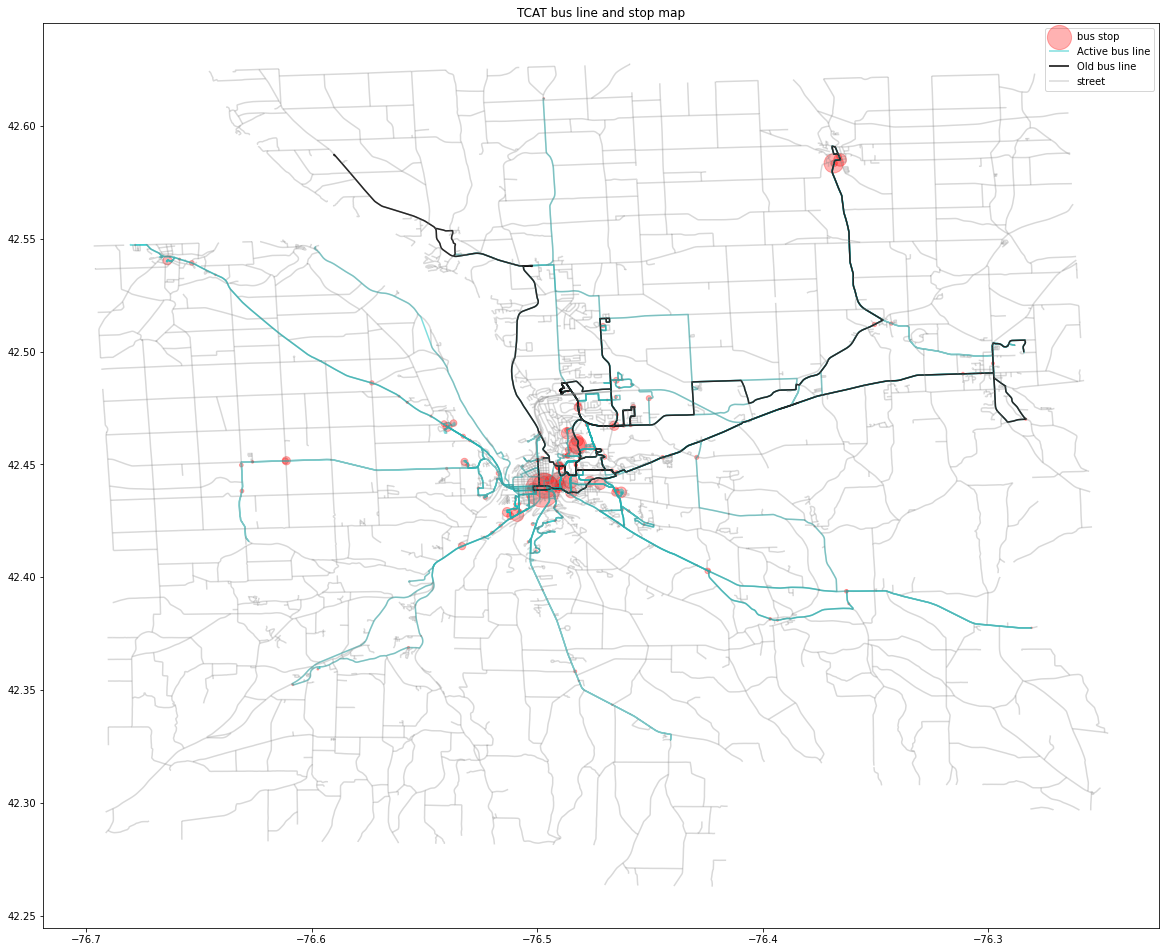

In [13]:
# Ridership in 2020
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')

s1=rider_geo['Sept 2019 Ridership']
s2=rider_geo['Sept 2020 Ridership']
rider_geo.plot(ax=ax,c="red",alpha=0.3,label='bus stop',markersize = s2*0.1)
Active.plot(ax=ax, color='c',alpha=0.5,label='Active bus line')
Old.plot(ax=ax, color='black',alpha=1,label='Old bus line')
Streets.plot(ax=ax, color='grey',alpha=0.3,label='street')

plt.title("TCAT bus line and stop map")
plt.legend()
plt.show();

In [14]:
lat = np.array(rider_geo["stop_lat"][0:len(rider_geo)])
lon = np.array(rider_geo["stop_lon"][0:len(rider_geo)])
ridership2019 = np.array(rider_geo["Sept 2019 Ridership"][0:len(rider_geo)],dtype=float)
ridership2020 = np.array(rider_geo["Sept 2020 Ridership"][0:len(rider_geo)],dtype=float)
change_number = np.array(rider_geo["Sept 2020 Ridership"][0:len(rider_geo)],dtype=float)

In [15]:
r2019 = [[lat[i],lon[i],ridership2019[i]] for i in range(len(rider_geo))]
r2020 = [[lat[i],lon[i],ridership2020[i]] for i in range(len(rider_geo))]

geo=[[lat[i],lon[i]] for i in range(len(rider_geo))]

### basemap

In [17]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import json
import requests

map0 = folium.Map(location=[42.4440,-76.5019], zoom_start=11,tiles='Stamen Toner')
#busline
with open("TDP_Active_Routes.geojson") as f:
    active = json.load(f)
folium.GeoJson(active, style_function=lambda feature: {'color': 'darkblue','weight':1.5}).add_to(map0)

for i in r2019:
    folium.CircleMarker(i[0:2], radius=0.01, color='black', fill=True, opacity=0.6).add_to(map0)
for j in r2020:
    folium.CircleMarker(j[0:2], radius=1, color='blue', fill=True, opacity=0.6).add_to(map0)
    
map0

In [18]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import json
import requests

map0 = folium.Map(location=[42.4440,-76.5019], zoom_start=12,tiles='Stamen Toner')

with open("TDP_Active_Routes.geojson") as f:
    active = json.load(f)
folium.GeoJson(active, style_function=lambda feature: {'color': 'deepskyblue','weight':1}).add_to(map0)

for i in r2019:
    folium.CircleMarker(i[0:2], radius=i[2]*0.0008, color='red', fill=True, opacity=0.6).add_to(map0)
for j in r2020:
    folium.CircleMarker(j[0:2], radius=j[2]*0.0008, color='blue', fill=True, opacity=0.6).add_to(map0)
    
map0

Text(0, 0.5, 'ridership')

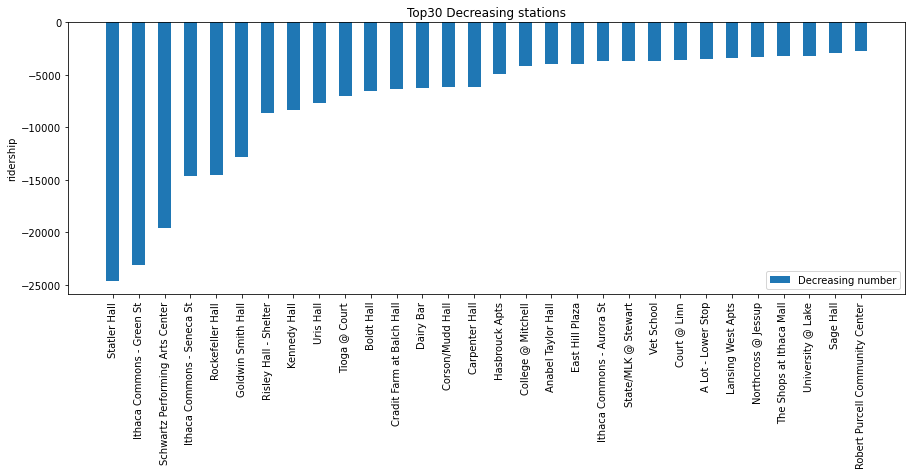

In [32]:
## Select Top30 Decreasing stations
Top_denumber30=rider_geo.sort_values(by=['change'],ascending=True).iloc[0:30]
Top_innumber30=rider_geo.sort_values(by=['change'],ascending=False).iloc[0:30]

ax = plt.figure(figsize = (15,5))
plt.bar(np.arange(len(Top_denumber30)),Top_denumber30['change'], 0.5,label = 'Decreasing number')
plt.xticks(np.arange(len(Top_denumber30)),Top_denumber30['stop_name'],rotation=90,fontsize=10)
plt.title('Top30 Decreasing stations')
plt.legend()
plt.ylabel('ridership')

In [19]:
lat1 = np.array(Top_denumber30["stop_lat"][0:len(Top_denumber30)])
lon1 = np.array(Top_denumber30["stop_lon"][0:len(Top_denumber30)])
change1 = np.array(Top_denumber30["change"][0:len(Top_denumber30)],dtype=float)

lat2 = np.array(Top_innumber30["stop_lat"][0:len(Top_innumber30)])
lon2 = np.array(Top_innumber30["stop_lon"][0:len(Top_innumber30)])
change2 = np.array(Top_innumber30["change"][0:len(Top_innumber30)],dtype=float)

Top_de = [[lat1[i],lon1[i],change1[i]] for i in range(len(Top_denumber30))]
Top_in = [[lat2[i],lon2[i],change2[i]] for i in range(len(Top_innumber30))]

NameError: name 'Top_denumber30' is not defined

In [20]:
map1 = folium.Map(location=[42.4440,-76.5019], zoom_start=12,tiles='Stamen Toner')
#busline
with open("TDP_Active_Routes.geojson") as f:
    active = json.load(f)
folium.GeoJson(active, style_function=lambda feature: {'color': 'darkblue','weight':1}).add_to(map1)

for i in Top_de:
    folium.CircleMarker(i[0:2], radius=6, color='blue', fill=True, opacity=0.6).add_to(map1)
for j in Top_in:
    folium.CircleMarker(j[0:2], radius=6, color='orange', fill=True, opacity=0.6).add_to(map1)
    
map1

NameError: name 'Top_de' is not defined